In [33]:
import numpy as np
import pandas as pd
from math import isnan
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [12,8]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

pd.options.display.max_columns =400
pd.options.display.max_rows =100

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Explore

## Data view

In [34]:
df_root = pd.read_excel('output\\3_data_transform_byRaw_v1.xlsx', header=[0,1])
df_root.shape

(1010, 565)

In [35]:
df_root.columns[3]

('Identification Data', 'data.details.sources_0.name')

In [40]:
# Diccionario para almacenar cada sub-dataframe
dataframes = {}

# Iterar sobre los niveles del MultiIndex (nivel 0)
for name, group in df_root.groupby(axis=1, level=0):
    dataframes[name] = df_root[name]

df_ident = list(dataframes.values())[0]
df_ingr_class = list(dataframes.values())[1]
df_ingr_subclass = list(dataframes.values())[2]
df_prop = list(dataframes.values())[3]

In [47]:
df_prop.head(20)

,data.rawProperties.chemicalProperties.swelling_ratio,data.rawProperties.chemicalProperties.water_absorption,data.rawProperties.chemicalProperties.total_soluble_matter,data.rawProperties.chemicalProperties.dissolution_time,data.rawProperties.chemicalProperties.moisture_absorption_capacity,data.rawProperties.chemicalProperties.oil_absorption,data.rawProperties.chemicalProperties.wetting_time,data.rawProperties.opticalProperties.colour_difference,data.rawProperties.opticalProperties.transparency,data.rawProperties.opticalProperties.light_transmittence_values300nm,data.rawProperties.opticalProperties.light_transmittence_values200nm,data.rawProperties.opticalProperties.transmittance,data.rawProperties.opticalProperties.opacity,data.rawProperties.opticalProperties.whitness_index,data.rawProperties.opticalProperties.light_transmittence_values_t280,data.rawProperties.opticalProperties.light_transmittence_values600nm,data.rawProperties.opticalProperties.clarity,data.rawProperties.opticalProperties.light_transmittence,data.rawProperties.opticalProperties.light_transmittence_values_t660,data.rawProperties.opticalProperties.light_transmittence_values350nm,data.rawProperties.opticalProperties.haze,data.rawProperties.opticalProperties.light_transmittence_values400nm,data.rawProperties.opticalProperties.light_transmittence_values500nm,data.rawProperties.opticalProperties.light_transmittence_values800nm,data.rawProperties.thermalProperties.melting_temperator,data.rawProperties.thermalProperties.maximum_temperature,data.rawProperties.thermalProperties.onset_temperature,data.rawProperties.thermalProperties.thermal_stability/_thermal_degregation,data.rawProperties.thermalProperties.peak_endothermic,data.rawProperties.thermalProperties.degredation_temperature,data.rawProperties.thermalProperties.peak_exothermic,data.rawProperties.thermalProperties.glass_transition_temperature,data.rawProperties.thermalProperties.experimental_residue_content_at600°_c,data.rawProperties.thermalProperties.crystallization_temperature,data.rawProperties.thermalProperties.theoretical_residue_content,data.rawProperties.thermalProperties.enthalpy_point,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index0_day,data.rawProperties.antioxidantProperties.leaching_losses,data.rawProperties.antioxidantProperties.antioxidant_activity_d_p_p_h,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index3_day,data.rawProperties.antioxidantProperties.antioxidant_activity_a_b_t_s,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index7_day,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index9_day,data.rawProperties.antioxidantProperties.a_t_t_c43300,data.rawProperties.antioxidantProperties.a_t_t_c25922,data.rawProperties.antioxidantProperties.a_t_t_c14028,data.rawProperties.antioxidantProperties.a_t_t_c35667,data.rawProperties.antioxidantProperties.a_t_t_c70060,data.rawProperties.antioxidantProperties.a_t_t_c29212,data.rawProperties.antimicrobialProperties2.antimicrobial_time,data.rawProperties.antimicrobialProperties2.l._monocytogenes,data.rawProperties.antimicrobialProperties2.e._coli,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c6538,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c43300,data.rawProperties.antimicrobialProperties2.bacillus_subtilis_b29,data.rawProperties.antimicrobialProperties2.s._aureus,data.rawProperties.mechanicalTensionProperties.tensile_strength,data.rawProperties.mechanicalTensionProperties.young's_modulus,data.rawProperties.mechanicalTensionProperties.elongation_at_break,data.rawProperties.physicalProperties.thickness,data.rawProperties.physicalProperties.crystallinity,data.rawProperties.physicalProperties.crystallinity_index,data.rawProperties.physicalProperties.crystallinity_time,data.rawProperties.physicalProperties.density,data.rawProperties.physicalProperties.particle_size,data.rawProperties.physi

## Research questions

### ¿What's the materials frecuency?

**by class**

Total materials:


155

Total records:


2621.0

<Axes: >

Text(0, 0.5, 'N° Records')

Text(0.5, 1.0, '50 components with more records by Class')

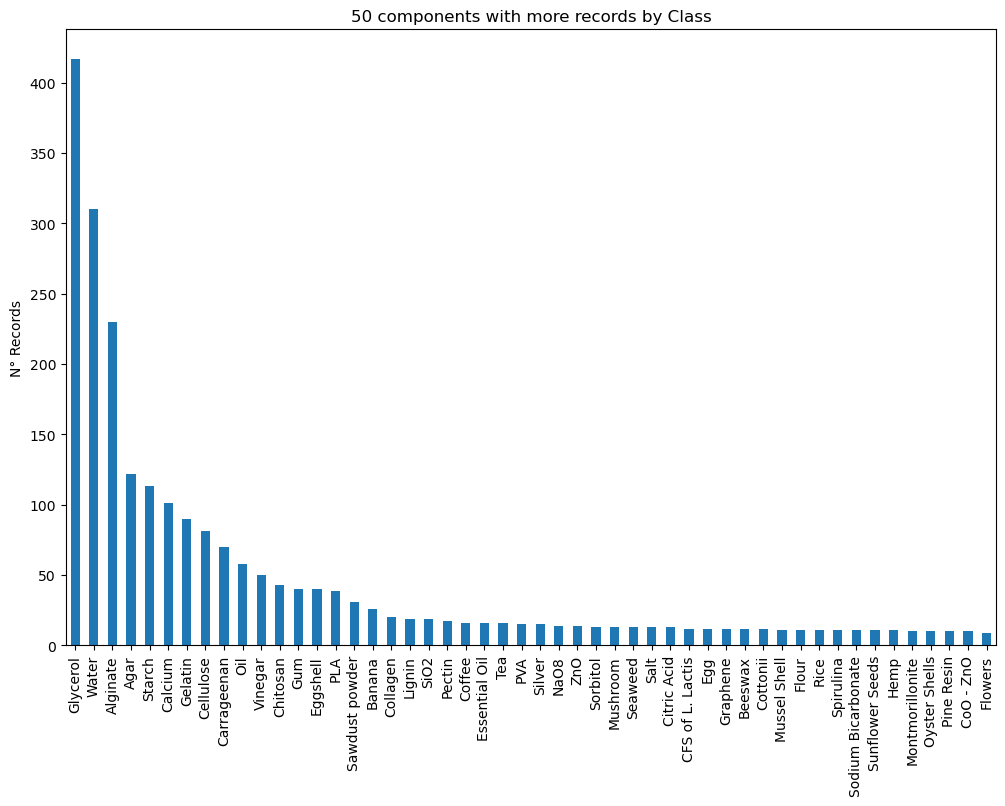

In [59]:
materials_count = df_ingr_class.describe(include='all').T['count'].sort_values(ascending=False)
print('Total materials:')
materials_count.count()
print('Total records:')
materials_count.sum()
materials_count[:50].plot(kind="bar")
plt.ylabel('N° Records')
plt.title('50 components with more records by Class')

- The contribution of some components grouped in the labeling, such as oils, calcium or starch, can be observed.

- However, they do not show the reality of other components of interest that do have variations in their origin and that could be relevant for the predictive model. 

Looking at the graph below:

**by subclass**

Total materials:


260

Total records:


2642.0

<Axes: >

Text(0, 0.5, 'N° Records')

Text(0.5, 1.0, '50 components with more records by Subclass')

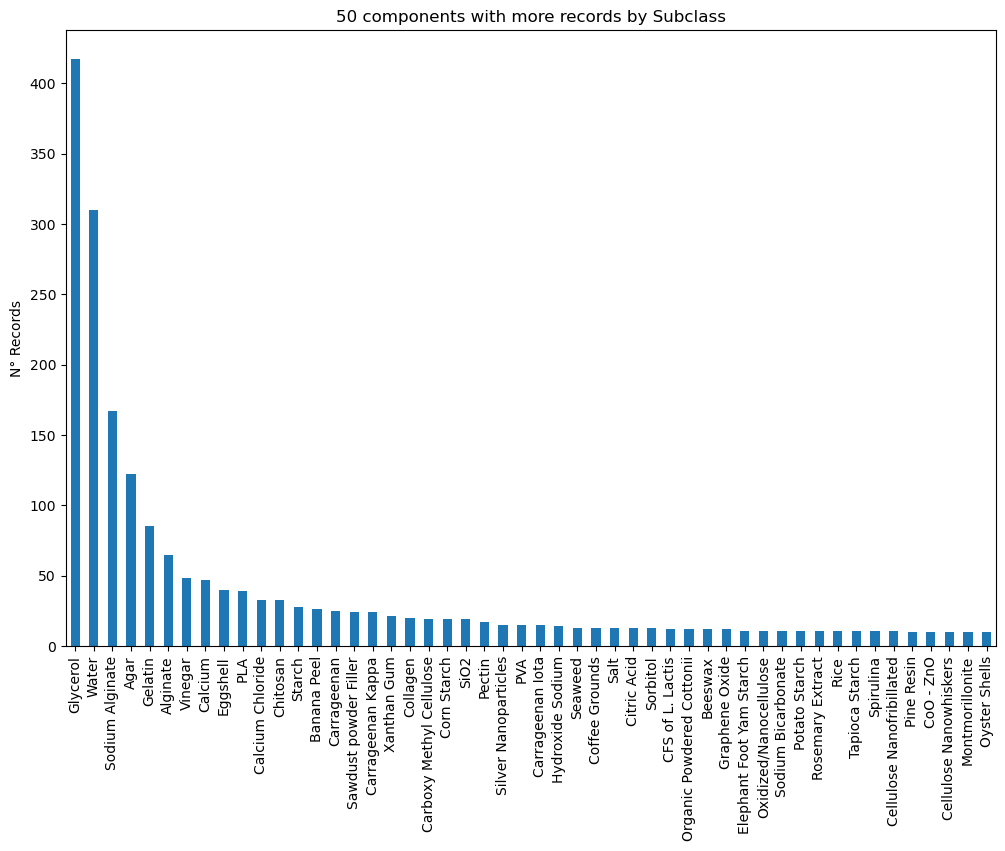

In [60]:
materials_count = df_ingr_subclass.describe(include='all').T['count'].sort_values(ascending=False)
print('Total materials:')
materials_count.count()
print('Total records:')
materials_count.sum()
materials_count[:50].plot(kind="bar")
plt.ylabel('N° Records')
plt.title('50 components with more records by Subclass')

- Instead, it is now possible to observe the variation of the components themselves with some quite significant ones such as cellulose, carrageenan or starch.

### ¿What's the properties frecuency?

Total properties:


133

Total records:


2446.0

<Axes: >

Text(0, 0.5, 'N° Records')

Text(0.5, 1.0, '50 properties with more records')

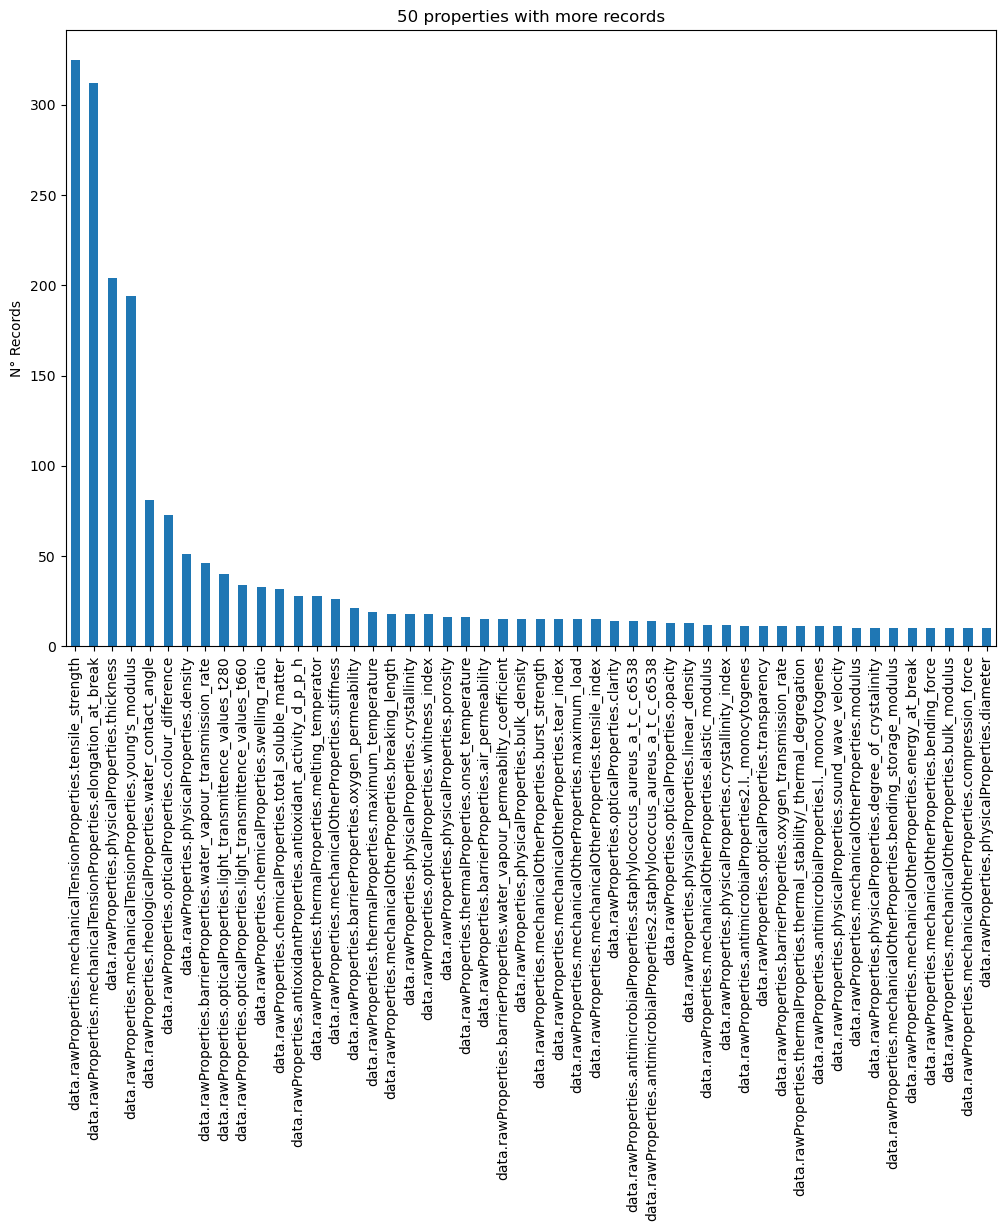

In [58]:
propr_count = df_prop.describe(include='all').T['count'].sort_values(ascending=False)
print('Total properties:')
propr_count.count()
print('Total records:')
propr_count.sum()
propr_count[:50].plot(kind="bar")
plt.ylabel('N° Records')
plt.title('50 properties with more records')

### ¿How many articles are included in the data?

Total articles:


62

Total records:


546

<Axes: xlabel='data.details.sources_0.name'>

Text(0, 0.5, 'N° Records')

Text(0.5, 1.0, 'Articles with more records')

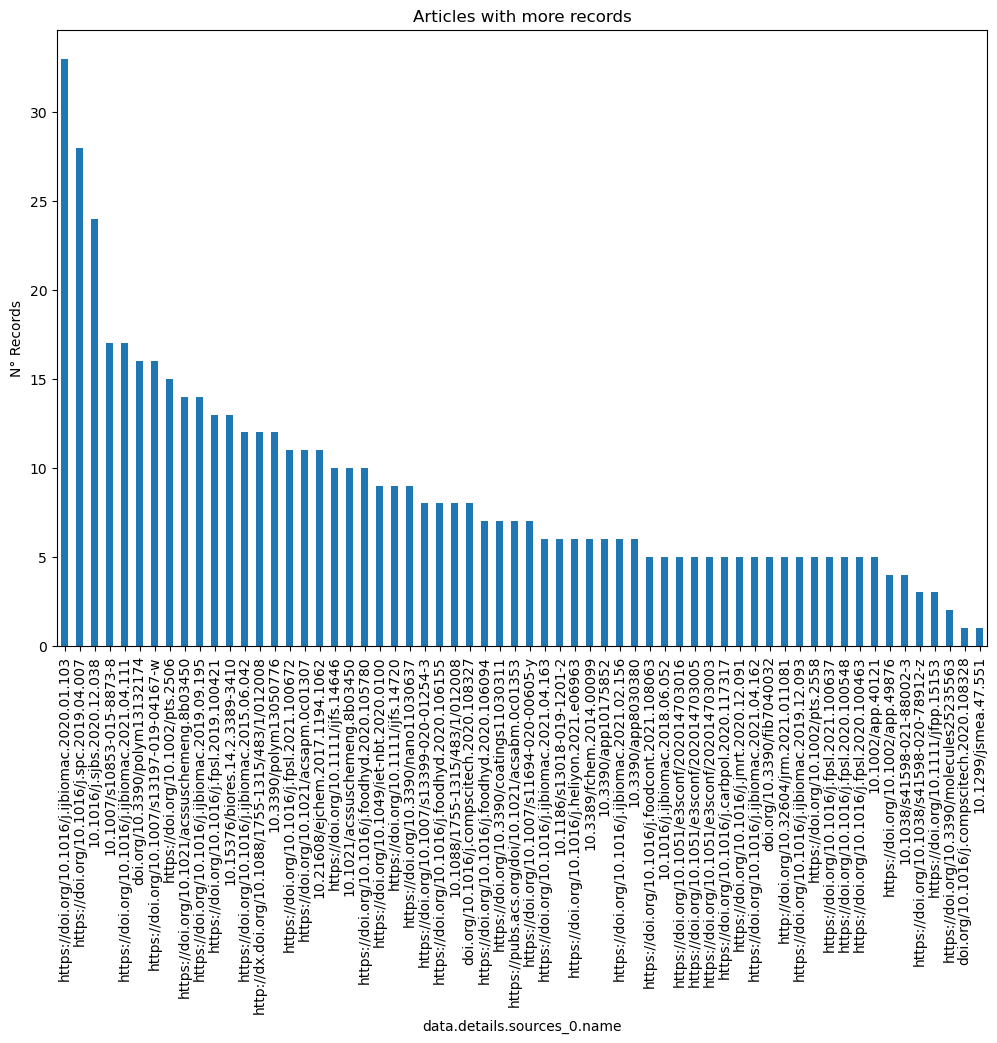

In [54]:
groupby_doi = df_ident.groupby(by=['data.details.sources_0.name'])
doi_count = groupby_doi['Unnamed: 0'].count().sort_values(ascending=False)
print('Total articles:')
doi_count.count()
print('Total records:')
doi_count.sum()
doi_count.plot(kind="bar")
plt.ylabel('N° Records')
plt.title('Articles with more records')

### ¿How the property report is distributed?

In [61]:
df_aux = pd.concat([df_ident,df_prop],axis=1)
df_aux

,Unnamed: 0,_id.$oid,data.details.sources_0.name,data.group,data.group_id,data.unique_id,generated,import_type,status,updated_at.$date.$numberLong,created_at.$date.$numberLong,data.name,data.methods_0.description,data.details.prepTime,data.ambientConditions.temperature,data.ambientConditions.humidity,data.rawProperties.chemicalProperties.swelling_ratio,data.rawProperties.chemicalProperties.water_absorption,data.rawProperties.chemicalProperties.total_soluble_matter,data.rawProperties.chemicalProperties.dissolution_time,data.rawProperties.chemicalProperties.moisture_absorption_capacity,data.rawProperties.chemicalProperties.oil_absorption,data.rawProperties.chemicalProperties.wetting_time,data.rawProperties.opticalProperties.colour_difference,data.rawProperties.opticalProperties.transparency,data.rawProperties.opticalProperties.light_transmittence_values300nm,data.rawProperties.opticalProperties.light_transmittence_values200nm,data.rawProperties.opticalProperties.transmittance,data.rawProperties.opticalProperties.opacity,data.rawProperties.opticalProperties.whitness_index,data.rawProperties.opticalProperties.light_transmittence_values_t280,data.rawProperties.opticalProperties.light_transmittence_values600nm,data.rawProperties.opticalProperties.clarity,data.rawProperties.opticalProperties.light_transmittence,data.rawProperties.opticalProperties.light_transmittence_values_t660,data.rawProperties.opticalProperties.light_transmittence_values350nm,data.rawProperties.opticalProperties.haze,data.rawProperties.opticalProperties.light_transmittence_values400nm,data.rawProperties.opticalProperties.light_transmittence_values500nm,data.rawProperties.opticalProperties.light_transmittence_values800nm,data.rawProperties.thermalProperties.melting_temperator,data.rawProperties.thermalProperties.maximum_temperature,data.rawProperties.thermalProperties.onset_temperature,data.rawProperties.thermalProperties.thermal_stability/_thermal_degregation,data.rawProperties.thermalProperties.peak_endothermic,data.rawProperties.thermalProperties.degredation_temperature,data.rawProperties.thermalProperties.peak_exothermic,data.rawProperties.thermalProperties.glass_transition_temperature,data.rawProperties.thermalProperties.experimental_residue_content_at600°_c,data.rawProperties.thermalProperties.crystallization_temperature,data.rawProperties.thermalProperties.theoretical_residue_content,data.rawProperties.thermalProperties.enthalpy_point,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index0_day,data.rawProperties.antioxidantProperties.leaching_losses,data.rawProperties.antioxidantProperties.antioxidant_activity_d_p_p_h,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index3_day,data.rawProperties.antioxidantProperties.antioxidant_activity_a_b_t_s,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index7_day,data.rawProperties.antioxidantProperties.a_n_t_i_o_x_i_d_a_n_t_for_peroxide_index9_day,data.rawProperties.antioxidantProperties.a_t_t_c43300,data.rawProperties.antioxidantProperties.a_t_t_c25922,data.rawProperties.antioxidantProperties.a_t_t_c14028,data.rawProperties.antioxidantProperties.a_t_t_c35667,data.rawProperties.antioxidantProperties.a_t_t_c70060,data.rawProperties.antioxidantProperties.a_t_t_c29212,data.rawProperties.antimicrobialProperties2.antimicrobial_time,data.rawProperties.antimicrobialProperties2.l._monocytogenes,data.rawProperties.antimicrobialProperties2.e._coli,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c6538,data.rawProperties.antimicrobialProperties2.staphylococcus_aureus_a_t_c_c43300,data.rawProperties.antimicrobialProperties2.bacillus_subtilis_b29,data.rawProperties.antimicrobialProperties2.s._aureus,data.rawProperties.mechanicalTensionProperties.tensile_strength,data.rawProperties.mechanicalTensionProperties.young's_modulus,data.rawProperties.mechanicalTensionProperties.elongation_at_break,data.rawProperties.physicalPropertie

In [62]:
grouped_data = df_aux.groupby('data.details.sources_0.name').apply(lambda df: df.notnull().sum())
grouped_data.drop(columns=df_ident.columns, inplace=True)
grouped_data.reset_index(inplace=True)

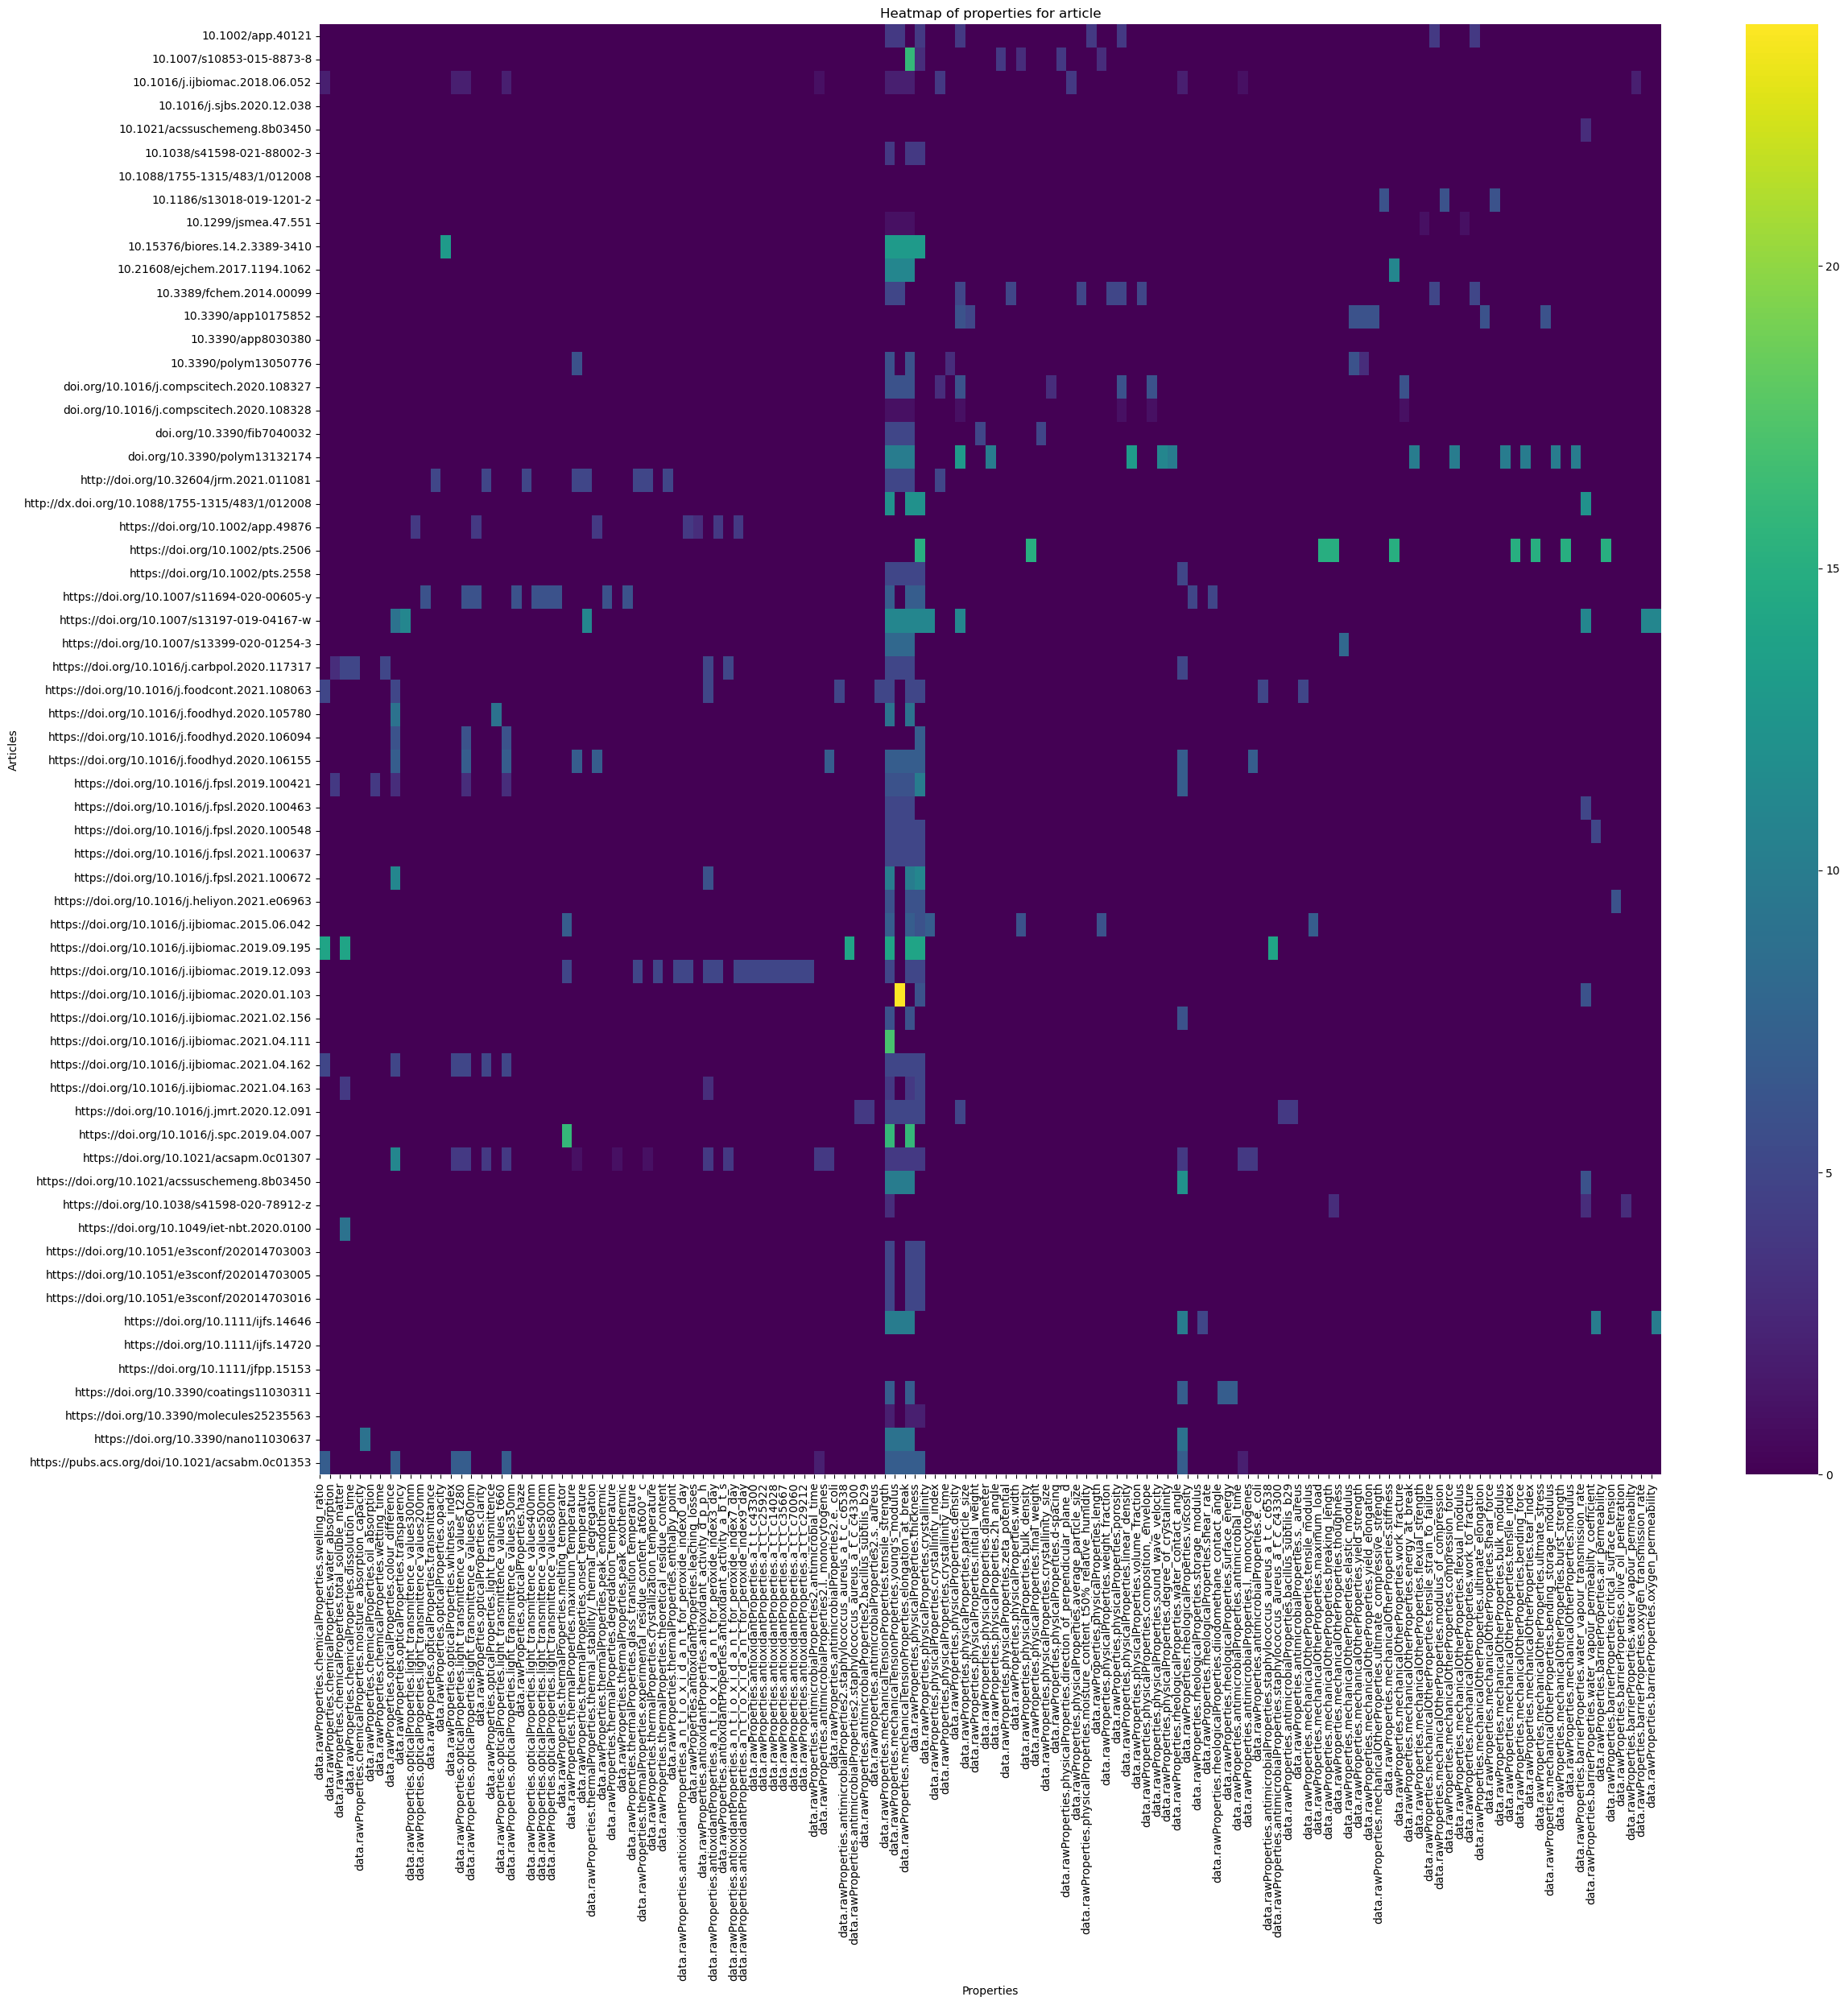

In [63]:
plt.figure(figsize=(25, 25))
heatmap_data  = grouped_data.set_index('data.details.sources_0.name')
ax = sns.heatmap(heatmap_data, cmap='viridis')

plt.title('Heatmap of properties for article')
plt.xlabel('Properties')
plt.ylabel('Articles')
plt.xticks(rotation=90)  # Rotar las etiquetas de las columnas
# Asegurar que todas las etiquetas del eje x sean visibles
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns)

# Ajustar el layout para evitar que se recorten las etiquetas
plt.tight_layout()
plt.show();